In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

print(tf.__version__)


2.17.0


In [2]:
# Define the dataset path
dataset_path = 'D:/COURSES/MACHINE LEARNING/Food Calorie Recognition'

for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


D:/COURSES/MACHINE LEARNING/Food Calorie Recognition\calorie.h5
D:/COURSES/MACHINE LEARNING/Food Calorie Recognition\calorie.ipynb
D:/COURSES/MACHINE LEARNING/Food Calorie Recognition\calorie.py
D:/COURSES/MACHINE LEARNING/Food Calorie Recognition\food.py
D:/COURSES/MACHINE LEARNING/Food Calorie Recognition\foodcalorierecognition.ipynb
D:/COURSES/MACHINE LEARNING/Food Calorie Recognition\Food_Calorie_Recognition_Model.h5
D:/COURSES/MACHINE LEARNING/Food Calorie Recognition\FV_1.h5
D:/COURSES/MACHINE LEARNING/Food Calorie Recognition\streamlit_app.py
D:/COURSES/MACHINE LEARNING/Food Calorie Recognition\.ipynb_checkpoints\calorie-checkpoint.ipynb
D:/COURSES/MACHINE LEARNING/Food Calorie Recognition\.ipynb_checkpoints\foodcalorierecognition-checkpoint.ipynb
D:/COURSES/MACHINE LEARNING/Food Calorie Recognition\test\apple\Image_1.jpg
D:/COURSES/MACHINE LEARNING/Food Calorie Recognition\test\apple\Image_10.jpg
D:/COURSES/MACHINE LEARNING/Food Calorie Recognition\test\apple\Image_2.jpg
D:/COU

In [3]:
# Create a list with the filepaths for training and testing
train_dir = Path(os.path.join(dataset_path, 'train'))
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path(os.path.join(dataset_path, 'test'))
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path(os.path.join(dataset_path, 'validation'))
val_filepaths = list(val_dir.glob(r'**/*.jpg'))


In [6]:
def image_processing(filepath):
    """Create a DataFrame with the filepath and the labels of the pictures"""
    labels = []
    for file in filepath:
        parts = os.path.normpath(file).split(os.sep)
        if len(parts) > 1:
            labels.append(parts[-2])
        else:
            labels.append("Unknown")

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df


In [7]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [8]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['lemon' 'cabbage' 'pomegranate' 'cucumber' 'pineapple' 'sweetcorn'
 'cauliflower' 'corn' 'kiwi' 'banana' 'pear' 'apple' 'turnip' 'onion'
 'chilli pepper' 'tomato' 'grapes' 'peas' 'beetroot' 'sweetpotato'
 'garlic' 'mango' 'eggplant' 'spinach' 'capsicum' 'soy beans' 'paprika'
 'watermelon' 'orange' 'carrot' 'lettuce' 'jalepeno' 'bell pepper'
 'ginger' 'potato' 'raddish']


In [9]:
train_df.head(5)

,Filepath,Label
0,D:\COURSES\MACHINE LEARNING\Food Calorie Recog...,lemon
1,D:\COURSES\MACHINE LEARNING\Food Calorie Recog...,cabbage
2,D:\COURSES\MACHINE LEARNING\Food Calorie Recog...,pomegranate
3,D:\COURSES\MACHINE LEARNING\Food Calorie Recog...,pomegranate
4,D:\COURSES\MACHINE LEARNING\Food Calorie Recog...,cucumber


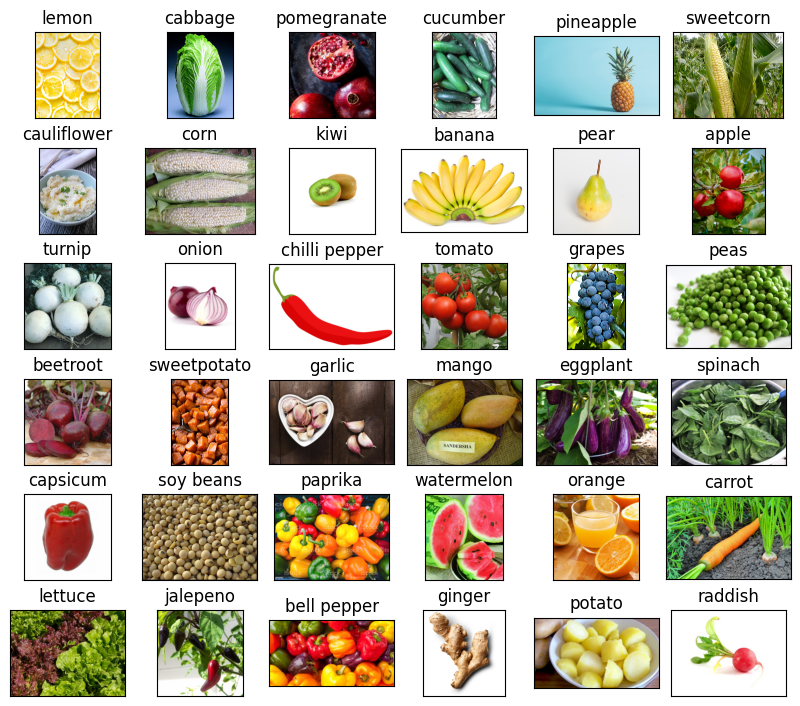

In [10]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [12]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2855 validated image filenames belonging to 36 classes.


In [11]:
pred = model.predict(test_images)
pred = np.argmax(pred, axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v, k) for k, v in labels.items())
pred1 = [labels[k] for k in pred]
pred1


11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step


['garlic',
 'pear',
 'sweetcorn',
 'sweetcorn',
 'lettuce',
 'carrot',
 'grapes',
 'cucumber',
 'cauliflower',
 'eggplant',
 'banana',
 'turnip',
 'grapes',
 'sweetpotato',
 'cucumber',
 'garlic',
 'pomegranate',
 'grapes',
 'carrot',
 'banana',
 'beetroot',
 'mango',
 'apple',
 'lettuce',
 'eggplant',
 'turnip',
 'jalepeno',
 'sweetpotato',
 'spinach',
 'pomegranate',
 'potato',
 'sweetpotato',
 'peas',
 'cabbage',
 'sweetcorn',
 'garlic',
 'cabbage',
 'ginger',
 'sweetpotato',
 'pomegranate',
 'lettuce',
 'mango',
 'mango',
 'cabbage',
 'watermelon',
 'lemon',
 'kiwi',
 'cucumber',
 'turnip',
 'jalepeno',
 'eggplant',
 'apple',
 'chilli pepper',
 'soy beans',
 'ginger',
 'tomato',
 'orange',
 'apple',
 'carrot',
 'watermelon',
 'sweetcorn',
 'beetroot',
 'watermelon',
 'sweetcorn',
 'soy beans',
 'tomato',
 'raddish',
 'orange',
 'eggplant',
 'apple',
 'orange',
 'peas',
 'banana',
 'onion',
 'onion',
 'cucumber',
 'cauliflower',
 'cauliflower',
 'spinach',
 'beetroot',
 'eggplant',


In [13]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [14]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [15]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [16]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


C:\Users\shubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.3634 - loss: 2.5705 - val_accuracy: 0.8794 - val_loss: 0.4598
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.8213 - loss: 0.5698 - val_accuracy: 0.9235 - val_loss: 0.3311
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.8920 - loss: 0.3492 - val_accuracy: 0.9294 - val_loss: 0.2532
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.9336 - loss: 0.2128 - val_accuracy: 0.9559 - val_loss: 0.1940
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.9542 - loss: 0.1525 - val_accuracy: 0.9441 - val_loss: 0.1945


In [17]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step


['turnip',
 'beetroot',
 'turnip',
 'grapes',
 'pomegranate',
 'mango',
 'pomegranate',
 'lettuce',
 'carrot',
 'sweetpotato',
 'sweetpotato',
 'pomegranate',
 'mango',
 'pomegranate',
 'eggplant',
 'pineapple',
 'cucumber',
 'potato',
 'cabbage',
 'sweetpotato',
 'garlic',
 'peas',
 'garlic',
 'banana',
 'onion',
 'watermelon',
 'grapes',
 'beetroot',
 'lemon',
 'corn',
 'lemon',
 'corn',
 'bell pepper',
 'beetroot',
 'pineapple',
 'onion',
 'lettuce',
 'cauliflower',
 'tomato',
 'cauliflower',
 'jalepeno',
 'garlic',
 'watermelon',
 'sweetpotato',
 'chilli pepper',
 'jalepeno',
 'chilli pepper',
 'watermelon',
 'raddish',
 'raddish',
 'carrot',
 'garlic',
 'potato',
 'jalepeno',
 'lettuce',
 'ginger',
 'spinach',
 'orange',
 'banana',
 'cauliflower',
 'orange',
 'onion',
 'garlic',
 'pear',
 'cabbage',
 'lemon',
 'cauliflower',
 'garlic',
 'bell pepper',
 'onion',
 'mango',
 'cabbage',
 'orange',
 'cauliflower',
 'corn',
 'corn',
 'sweetcorn',
 'sweetcorn',
 'raddish',
 'garlic',
 'p

In [18]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [20]:
img = output('D:/COURSES/MACHINE LEARNING/Food Calorie Recognition/test/cabbage/Image_1.jpg')
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'cabbage'

In [21]:
model.save('FCR.h5')